# Time Series:Stock prices analysis 
### The aim of this project was to build stock portfolio by extracting information from online stock trading site - Yahoo!Finance API, visualize them and compare return between two strategies: buy and hold stategy and trading using simple moving averages

### importing libraries 

In [1]:
import numpy as np
import pandas as pd
from datetime import date
!pip install yfinance 
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

# Getting the history data for stock prices
### Stock data was obtained from Yahoo! Finance. Table was created using only Close column( price of the stock at closing time ) from all stocks that will be used in this portfolio and date period is from 1/1/2021-1/1/2022.
#### stocks that will be used for this purpose are:
1.(AMD)Advanced Micro Devices
2.(GOOGL)Google
3.(WST)West Pharmaceutical Services 
4.(DXCM)DexCom INC.(Glucose monitoring)
5.(NVDA)NVIDIA corporation( graphics processing units for the gaming and professional markets, as well as system on a chip units for the mobile computing and automotive market.
6.(AAPL)Apple
7.(AMZN)Amazon
8.(MSFT)Microsoft
9.(NFLX)Netflix
10.(TSLA)Tesla

In [2]:
#choose starting date
start_date = '2020-01-01'
end_date= '2022-01-01'
#if using a current date as end date
#end_date=date.today().strftime("%Y-%m-%d")
symbol = ['AMD','GOOGL','WST','DXCM','NVDA','AAPL','AMZN','NFLX','TSLA','MSFT']#stock portfolio
df = yf.download(symbol, start=start_date, end = end_date)['Close'] #getting only Closing price values 
df.head()

[*********************100%***********************]  10 of 10 completed


,AAPL,AMD,AMZN,DXCM,GOOGL,MSFT,NFLX,NVDA,TSLA,WST
Date,,,,,,,,,,
2020-01-02,75.087502,49.099998,1898.010010,219.380005,1368.680054,160.619995,329.809998,59.977501,86.052002,151.740005
2020-01-03,74.357498,48.599998,1874.969971,218.699997,1361.520020,158.619995,325.899994,59.017502,88.601997,152.139999
2020-01-06,74.949997,48.389999,1902.880005,225.990005,1397.810059,159.029999,335.829987,59.264999,90.307999,152.220001
2020-01-07,74.597504,48.250000,1906.859985,231.449997,1395.109985,157.580002,330.750000,59.982498,93.811996,151.830002
2020-01-08,75.797501,47.830002,1891.969971,233.229996,1405.040039,160.089996,339.260010,60.095001,98.428001,149.779999


In [3]:
#checking last 5 rows
df.tail()

,AAPL,AMD,AMZN,DXCM,GOOGL,MSFT,NFLX,NVDA,TSLA,WST
Date,,,,,,,,,,
2021-12-27,180.330002,154.360001,3393.389893,569.880005,2958.129883,342.450012,613.119995,309.450012,1093.939941,465.890015
2021-12-28,179.289993,153.149994,3413.219971,529.500000,2933.739990,341.250000,610.710022,303.220001,1088.469971,464.869995
2021-12-29,179.380005,148.259995,3384.020020,535.400024,2933.100098,341.950012,610.539978,300.010010,1086.189941,467.989990
2021-12-30,178.199997,145.149994,3372.889893,541.309998,2924.010010,339.320007,612.090027,295.859985,1070.339966,471.339996
2021-12-31,177.570007,143.899994,3334.340088,536.950012,2897.040039,336.320007,602.440002,294.109985,1056.780029,469.010010


### Visualizing closing prices for all stocks 
#### here we are creating plot to visualize stock price movement over the time

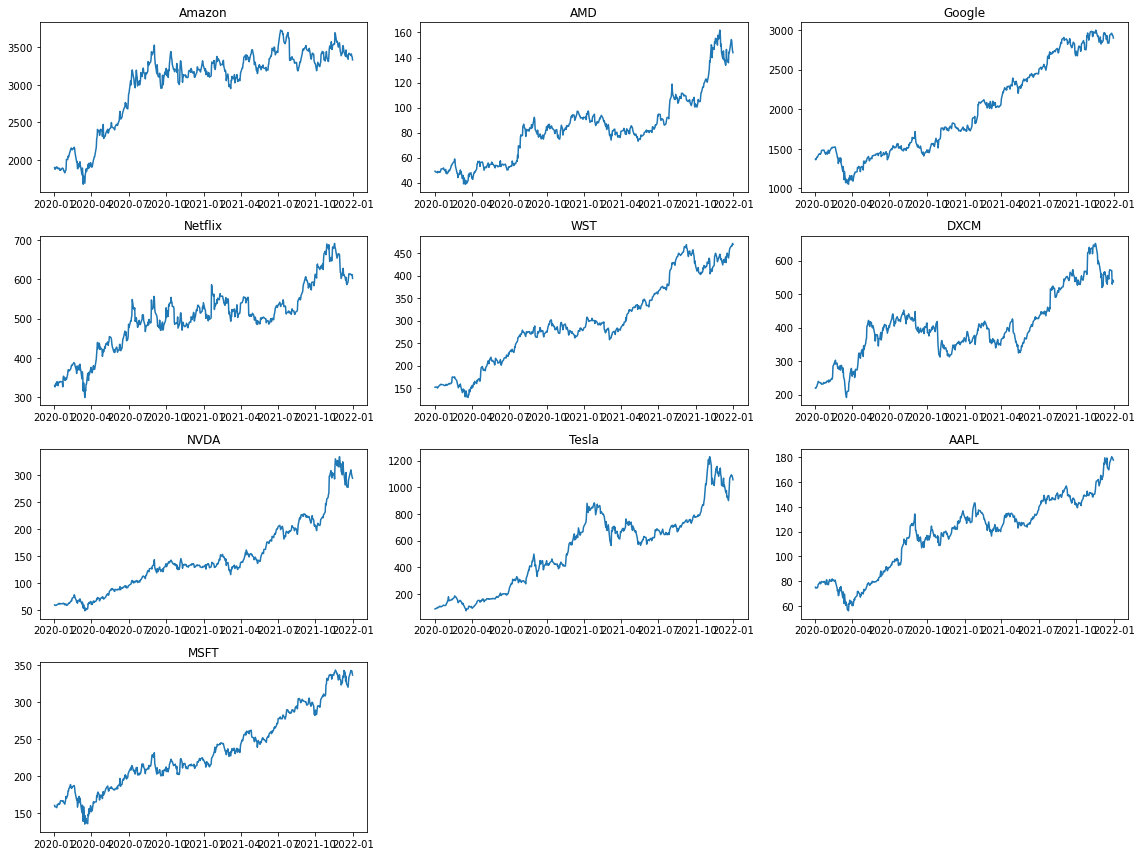

In [4]:
#Charting the stock prices for multiple stocks
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax1.plot(df['AMZN'])
ax1.set_title("Amazon")
ax2.plot(df['AMD'])
ax2.set_title("AMD")
ax3.plot(df['GOOGL'])
ax3.set_title("Google")
ax4.plot(df['NFLX'])
ax4.set_title("Netflix")
ax5.plot(df['WST'])
ax5.set_title("WST")
ax6.plot(df['DXCM'])
ax6.set_title("DXCM")
ax7.plot(df['NVDA'])
ax7.set_title("NVDA")
ax8.plot(df['TSLA'])
ax8.set_title("Tesla")
ax9.plot(df['AAPL'])
ax9.set_title("AAPL")
ax10.plot(df['MSFT'])
ax10.set_title("MSFT")
plt.tight_layout()
# save the figure
plt.savefig('Stock Price Movement.png')#format="png")
plt.show()


## 1.Analyzing AMD  stock
### We will start first with analyzing the Advanced Micro Devices (ticker: AMD) before applying to the entire stock portfolio.
### We are going to define values for simple moving averages:for short moving averags we will be using 50 days and for long moving averages will be using 200 days

In [5]:
# Get the AMD timeseries.
AMD = df.loc[:, 'AMD']
#AMD=pd.DataFrame ({'Close':df['AMD']})
#AMD.rename(columns={'Close': 'Closing Price'})
#AMD.columns=['Closing Price']
AMD.head()

Date
2020-01-02    49.099998
2020-01-03    48.599998
2020-01-06    48.389999
2020-01-07    48.250000
2020-01-08    47.830002
Name: AMD, dtype: float64

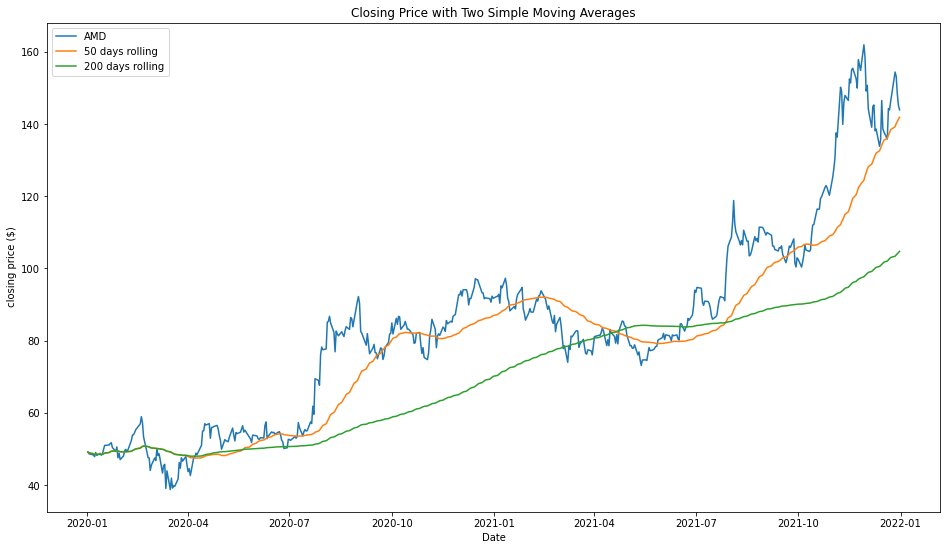

In [6]:
# Get the AMD timeseries.
AMD = df.loc[:, 'AMD']
# Calculate the 50 and 200 days moving averages of the closing prices
short_rolling_AMD= AMD.rolling(window=50,min_periods=1).mean()#min_periods calculate the arithmetic average starting from 1st numb 
long_rolling_AMD = AMD.rolling(window=200,min_periods=1).mean()

# Plot moving averages 
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(AMD.index, AMD, label='AMD')
ax.plot(short_rolling_AMD.index, short_rolling_AMD, label='50 days rolling')
ax.plot(long_rolling_AMD.index, long_rolling_AMD, label='200 days rolling')
plt.title('Closing Price with Two Simple Moving Averages')
ax.set_xlabel('Date')
ax.set_ylabel(' closing price ($)')
ax.legend();

# DataFrame for AMD stock 
#### In this part we are creating DataFrame for AMD stock with additional information: signal and position, return calculated using daily log return and total trading system return for buy and hold strategy.
#### 'Signal' column is generated in following: value 1 is set if 50-day SMA is greater than 200-day SMA , Value 0 is set when 200-day SMA is greater than 50-day SMA.
#### 'Position' column is day to day difference of 'Signal' column


In [7]:
#creating df for AMD stock
AMD=pd.DataFrame ({'Close':df['AMD'],'50_MA':short_rolling_AMD,'200_MA':long_rolling_AMD})
#generate signals
AMD['Signal']=np.where(AMD['50_MA']> AMD['200_MA'], 1, 0)
#generate trading orders
AMD['Position']=AMD['Signal'].diff()
# #calculating trading
AMD['Trade'] = np.where(AMD['50_MA']> AMD['200_MA'], 1, -1)
#to calculate instantaneous rate of return (daily log returns)
AMD['Return'] = np.log(AMD.Close).diff()
# calculation when use percent change
#AMD['Return']=AMD['Close'].pct_change()# another way of calculating return is using pct_change instead log returns 
# #calculating trading system return
AMD['Treturn']=AMD.Return*AMD.Trade
AMD.head(100)

,Close,50_MA,200_MA,Signal,Position,Trade,Return,Treturn
Date,,,,,,,,
2020-01-02,49.099998,49.099998,49.099998,0,NaN,-1,NaN,NaN
2020-01-03,48.599998,48.849998,48.849998,0,0.0,-1,-0.010236,0.010236
2020-01-06,48.389999,48.696665,48.696665,0,0.0,-1,-0.004330,0.004330
2020-01-07,48.250000,48.584999,48.584999,0,0.0,-1,-0.002897,0.002897
2020-01-08,47.830002,48.434000,48.434000,0,0.0,-1,-0.008743,0.008743
...,...,...,...,...,...,...,...,...
2020-05-19,55.470001,49.575200,49.711979,0,0.0,-1,0.015992,-0.015992
2020-05-20,56.389999,49.795400,49.780825,1,1.0,1,0.016449,0.016449
2020-05-21,54.650002,49.974400,49.830510,1,0.0,1,-0.031343,-0.031343


In [8]:
#remove NA values
AMD.dropna(inplace=True)

## Visualize daily returns
####  Visualizing daily returns can give us an insight how much price of the stock oscillates daily

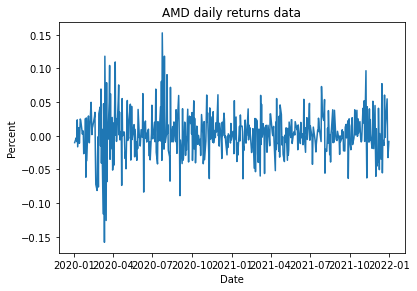

In [9]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(AMD['Return'])
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("AMD daily returns data")
plt.savefig('AMD DAILY RETURN.png',format="png")
plt.show()


### Ploting buying and selling signals on moving averages
#### Here we are showing buy and sell signals on moving averages where green indicates buying point and red indicates selling point

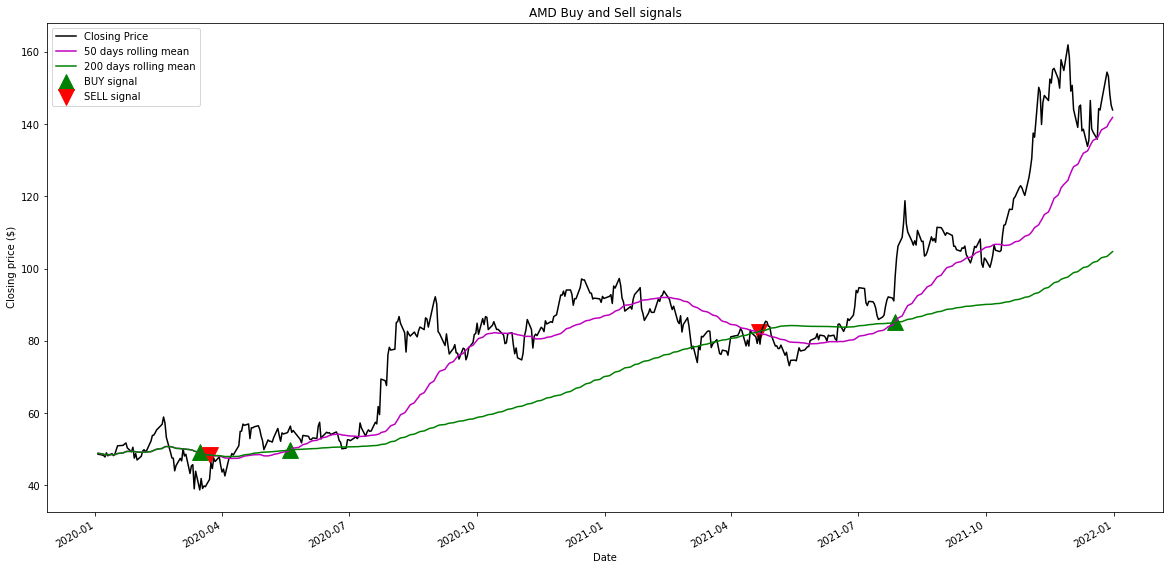

In [10]:
# Plot moving averages 
# plot closing price, short term moving averages and long term moving averages 
plt.figure(figsize=(20,10))
AMD['Close'].plot(color = 'k', label= 'Closing Price') 
AMD['50_MA'].plot(color = 'm',label = '50 days rolling mean') 
AMD['200_MA'].plot(color = 'g', label = '200 days rolling mean')
# plot ‘buy’ signals
plt.scatter(AMD.loc[AMD['Position'] == 1].index, 
         AMD['50_MA'][AMD['Position'] == 1], 
         marker='^', s=250,color = 'g', label = 'BUY signal')
# plot ‘sell’ signals
plt.scatter(AMD.loc[AMD['Position'] == -1].index, 
         AMD['50_MA'][AMD['Position'] == -1], 
         marker='v',s=250, color = 'r', label = 'SELL signal')
plt.title('AMD Buy and Sell signals')
plt.xlabel('Date')
plt.ylabel(' Closing price ($)')
plt.savefig('AMD buying and selling signals.png')
#plt.show()
plt.legend();

Daily return data

## Comparing returns between trading system and hold strategy 

In [11]:
#trading system return
total_treturn=np.exp(AMD.Treturn.sum())#total return of moving averages trading system
hold_return=np.exp(AMD.Return.sum())#total return of buy and hold strategy 

print("AMD Trading System total return: {:>10.2%}".format(total_treturn))
print("AMD Hold strategy return: {:>10.2%}".format(hold_return))

AMD Trading System total return:    141.76%
AMD Hold strategy return:    293.08%


### we can see that Hold strategy for AMD stock performed better with 293.08% return vs trading system strategy with 141.76% return

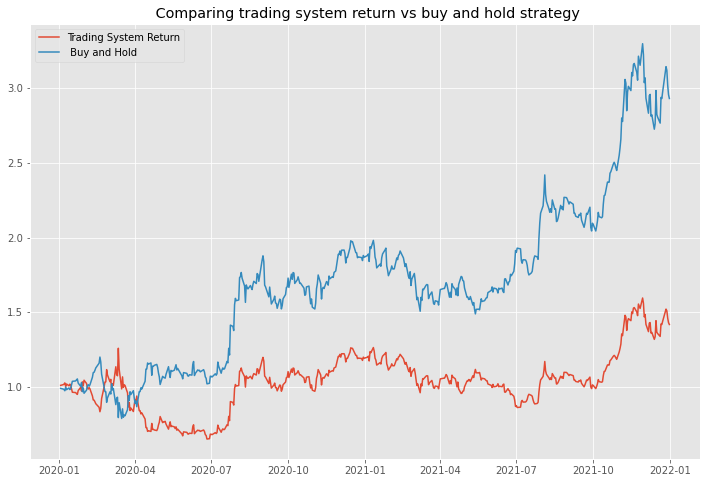

In [32]:
#compare return system vs hold strategy 
with plt.style.context('ggplot'):
    plt.figure(figsize=(12,8))   
    plt.plot(np.exp(AMD.Treturn.cumsum()),label='Trading System Return') 
    plt.plot(np.exp(AMD.Return.cumsum()),label=' Buy and Hold') 
    plt.title(' Comparing trading system return vs buy and hold strategy')
    plt.savefig('AMD Trading vs Buy and Hold graph.png')
    plt.legend(loc='upper left')

## 2. Analyzing all stocks and comparing their returns

In [13]:
# Calculating the short-window moving average for entire portfolio
short_rolling= df.rolling(window=50,min_periods=1).mean()
df_short = short_rolling.add_suffix('_short')
# Calculating the long-window moving average for entire portfolio
long_rolling = df.rolling(window=200,min_periods=1).mean()
df_long = long_rolling.add_suffix('_long')
#to join two tables into one df 
new_df=pd.concat([df_short,df_long],axis=1)
new_df.head()


,AAPL_short,AMD_short,AMZN_short,DXCM_short,GOOGL_short,MSFT_short,NFLX_short,NVDA_short,TSLA_short,WST_short,AAPL_long,AMD_long,AMZN_long,DXCM_long,GOOGL_long,MSFT_long,NFLX_long,NVDA_long,TSLA_long,WST_long
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,75.087502,49.099998,1898.010010,219.380005,1368.680054,160.619995,329.809998,59.977501,86.052002,151.740005,75.087502,49.099998,1898.010010,219.380005,1368.680054,160.619995,329.809998,59.977501,86.052002,151.740005
2020-01-03,74.722500,48.849998,1886.489990,219.040001,1365.100037,159.619995,327.854996,59.497501,87.327000,151.940002,74.722500,48.849998,1886.489990,219.040001,1365.100037,159.619995,327.854996,59.497501,87.327000,151.940002
2020-01-06,74.798332,48.696665,1891.953328,221.356669,1376.003377,159.423330,330.513326,59.420001,88.320666,152.033335,74.798332,48.696665,1891.953328,221.356669,1376.003377,159.423330,330.513326,59.420001,88.320666,152.033335
2020-01-07,74.748125,48.584999,1895.679993,223.880001,1380.780029,158.962498,330.572495,59.560625,89.693499,151.982502,74.748125,48.584999,1895.679993,223.880001,1380.780029,158.962498,330.572495,59.560625,89.693499,151.982502
2020-01-08,74.958000,48.434000,1894.937988,225.750000,1385.632031,159.187997,332.309998,59.667500,91.440399,151.542001,74.958000,48.434000,1894.937988,225.750000,1385.632031,159.187997,332.309998,59.667500,91.440399,151.542001


#### Creating trading column 

In [14]:
#calculating trading for entire portfolio
new_df['AMD_Trade'] = np.where(new_df['AMD_short']> new_df['AMD_long'], 1, -1)
new_df['AMZN_Trade'] = np.where(new_df['AMZN_short']> new_df['AMZN_long'], 1, -1)
new_df['AAPL_Trade'] = np.where(new_df['AAPL_short']> new_df['AAPL_long'], 1, -1)
new_df['DXCM_Trade'] = np.where(new_df['DXCM_short']> new_df['DXCM_long'], 1, -1)
new_df['MSFT_Trade'] = np.where(new_df['MSFT_short']> new_df['MSFT_long'], 1, -1)
new_df['NFLX_Trade'] = np.where(new_df['NFLX_short']> new_df['NFLX_long'], 1, -1)
new_df['NVDA_Trade'] = np.where(new_df['NVDA_short']> new_df['NVDA_long'], 1, -1)
new_df['TSLA_Trade'] = np.where(new_df['TSLA_short']> new_df['TSLA_long'], 1, -1)
new_df['WST_Trade'] = np.where(new_df['WST_short']> new_df['WST_long'], 1, -1)
new_df['GOOGL_Trade'] = np.where(new_df['GOOGL_short']> new_df['GOOGL_long'], 1, -1)
new_df.head()

,AAPL_short,AMD_short,AMZN_short,DXCM_short,GOOGL_short,MSFT_short,NFLX_short,NVDA_short,TSLA_short,WST_short,...,AMD_Trade,AMZN_Trade,AAPL_Trade,DXCM_Trade,MSFT_Trade,NFLX_Trade,NVDA_Trade,TSLA_Trade,WST_Trade,GOOGL_Trade
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,75.087502,49.099998,1898.010010,219.380005,1368.680054,160.619995,329.809998,59.977501,86.052002,151.740005,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2020-01-03,74.722500,48.849998,1886.489990,219.040001,1365.100037,159.619995,327.854996,59.497501,87.327000,151.940002,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2020-01-06,74.798332,48.696665,1891.953328,221.356669,1376.003377,159.423330,330.513326,59.420001,88.320666,152.033335,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2020-01-07,74.748125,48.584999,1895.679993,223.880001,1380.780029,158.962498,330.572495,59.560625,89.693499,151.982502,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2020-01-08,74.958000,48.434000,1894.937988,225.750000,1385.632031,159.187997,332.309998,59.667500,91.440399,151.542001,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


#### Creating return column 

In [15]:
# Log returns - First the logarithm of the closing prices is taken and then the difference of consecutive (log) observations
log_returns = np.log(df).diff()
df_return= log_returns.add_suffix('_Return')
new_df=pd.concat([df_return,new_df],axis=1)
new_df.head()

,AAPL_Return,AMD_Return,AMZN_Return,DXCM_Return,GOOGL_Return,MSFT_Return,NFLX_Return,NVDA_Return,TSLA_Return,WST_Return,...,AMD_Trade,AMZN_Trade,AAPL_Trade,DXCM_Trade,MSFT_Trade,NFLX_Trade,NVDA_Trade,TSLA_Trade,WST_Trade,GOOGL_Trade
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2020-01-03,-0.009770,-0.010236,-0.012213,-0.003104,-0.005245,-0.012530,-0.011926,-0.016135,0.029203,0.002633,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2020-01-06,0.007937,-0.004330,0.014776,0.032790,0.026305,0.002581,0.030014,0.004185,0.019072,0.000526,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2020-01-07,-0.004714,-0.002897,0.002089,0.023873,-0.001934,-0.009160,-0.015242,0.012034,0.038067,-0.002565,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2020-01-08,0.015958,-0.008743,-0.007839,0.007661,0.007093,0.015803,0.025404,0.001874,0.048033,-0.013594,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [16]:
#remove NA values
new_df.dropna(inplace=True)

In [17]:
#calculating instatenious rate of return
new_df['AMD_Treturn']=new_df.AMD_Return*new_df.AMD_Trade
AMD_total_treturn=np.exp(new_df.AMD_Treturn.sum())
print('AMD_total_treturn is:',AMD_total_treturn)
new_df['AMZN_Treturn']=new_df.AMZN_Return*new_df.AMZN_Trade
AMZN_total_treturn=np.exp(new_df.AMZN_Treturn.sum())
print('AMZN_total_treturn is:',AMZN_total_treturn)
new_df['AAPL_Treturn']=new_df.AAPL_Return*new_df.AAPL_Trade
AAPL_total_treturn=np.exp(new_df.AAPL_Treturn.sum())
print('AAPL_total_treturn is:',AAPL_total_treturn)
new_df['DXCM_Treturn']=new_df.DXCM_Return*new_df.DXCM_Trade
DXCM_total_treturn=np.exp(new_df.DXCM_Treturn.sum())
print('DXCM_total_treturn is:',DXCM_total_treturn)
new_df['MSFT_Treturn']=new_df.MSFT_Return*new_df.MSFT_Trade
MSFT_total_treturn=np.exp(new_df.MSFT_Treturn.sum())
print('MSFT_total_treturn is:',MSFT_total_treturn)
new_df['NFLX_Treturn']=new_df.NFLX_Return*new_df.NFLX_Trade
NFLX_total_treturn=np.exp(new_df.NFLX_Treturn.sum())
print('NFLX_total_treturn is:',NFLX_total_treturn)
new_df['NVDA_Treturn']=new_df.NVDA_Return*new_df.NVDA_Trade
NVDA_total_treturn=np.exp(new_df.NVDA_Treturn.sum())
print('NVDA_total_treturn is:',NVDA_total_treturn)
new_df['TSLA_Treturn']=new_df.TSLA_Return*new_df.TSLA_Trade
TSLA_total_treturn=np.exp(new_df.TSLA_Treturn.sum())
print('TSLA_total_treturn is:',TSLA_total_treturn)
new_df['WST_Treturn']=new_df.WST_Return*new_df.WST_Trade
WST_total_treturn=np.exp(new_df.WST_Treturn.sum())
print('WST_total_treturn is:',WST_total_treturn)
new_df['GOOGL_Treturn']=new_df.GOOGL_Return*new_df.GOOGL_Trade
GOOGL_total_treturn=np.exp(new_df.GOOGL_Treturn.sum())
print('GOOGL_total_treturn is;',GOOGL_total_treturn)

AMD_total_treturn is: 1.4176046743742508
AMZN_total_treturn is: 1.9189830426115897
AAPL_total_treturn is: 1.2261697592552285
DXCM_total_treturn is: 1.5445080873741373
MSFT_total_treturn is: 1.959740779600235
NFLX_total_treturn is: 1.6450456259859272
NVDA_total_treturn is: 4.8658743978484145
TSLA_total_treturn is: 5.8612396625851675
WST_total_treturn is: 2.024627585736403
GOOGL_total_treturn is; 1.6464497744386655


### Calculating portfolio return for trading strategy 

In [18]:
treturns_total = [AMD_total_treturn,AMZN_total_treturn,AAPL_total_treturn,DXCM_total_treturn,MSFT_total_treturn,NFLX_total_treturn,NVDA_total_treturn,TSLA_total_treturn,WST_total_treturn,GOOGL_total_treturn]

potrfolio_trade_strategy = sum(treturns_total) / len(treturns_total)
print("Portfolio return using trade strategy: {:>10.2%}".format(potrfolio_trade_strategy))


Portfolio return using trade strategy:    241.10%


### Calculating stock return for hold strategy 

In [19]:
#calculating stock return hold strategy  
log_returns_stock=np.exp(log_returns.sum())#total return of hold strategy
log_returns_stock

AAPL      2.364841
AMD       2.930754
AMZN      1.756756
DXCM      2.447580
GOOGL     2.116667
MSFT      2.093886
NFLX      1.826627
NVDA      4.903672
TSLA     12.280714
WST       3.090879
dtype: float64

### Calculating total return for portfolio using hold strategy

In [20]:
portfolio_return=log_returns_stock.mean(axis=0)
print("Portfolio return using hold strategy: {:>10.2%}".format(portfolio_return))

Portfolio return using hold strategy:    358.12%


#### We can see that hold strategy performed better with 358% return vs, trading strategy with 241% yearly return.

In [21]:
print("Portfolio return using trade strategy: {:>10.2%}".format(potrfolio_trade_strategy))
print("Portfolio return using hold strategy: {:>10.2%}".format(portfolio_return))

Portfolio return using trade strategy:    241.10%
Portfolio return using hold strategy:    358.12%


### Portfolio return using buy and hold strategy graph

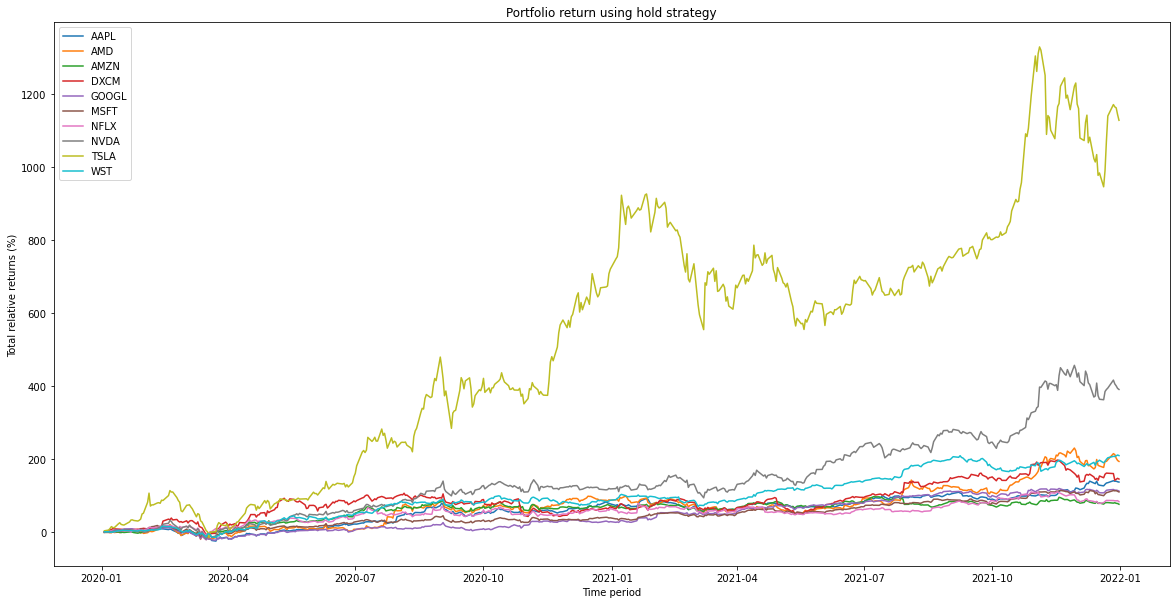

In [33]:
fig, ax= plt.subplots(figsize=(20,10))
for c in log_returns:
    ax.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax.set_ylabel('Total relative returns (%)')
ax.set_xlabel('Time period')
ax.set_title('Portfolio return using hold strategy')
ax.legend(loc='best')
plt.show()

### The information gathered on  returns was further used for Risk Analysis by calculating the Expected Return (Average / mean return of the stock) and standard deviation (measurement of Risk -> Greater the std. dev. greater is the risk and vice versa). A scatter plot was created for comparing the Expected return of stocks to its risk. This helped in visualizing the risk factor of various stocks (stocks with high standard deviation and low return).

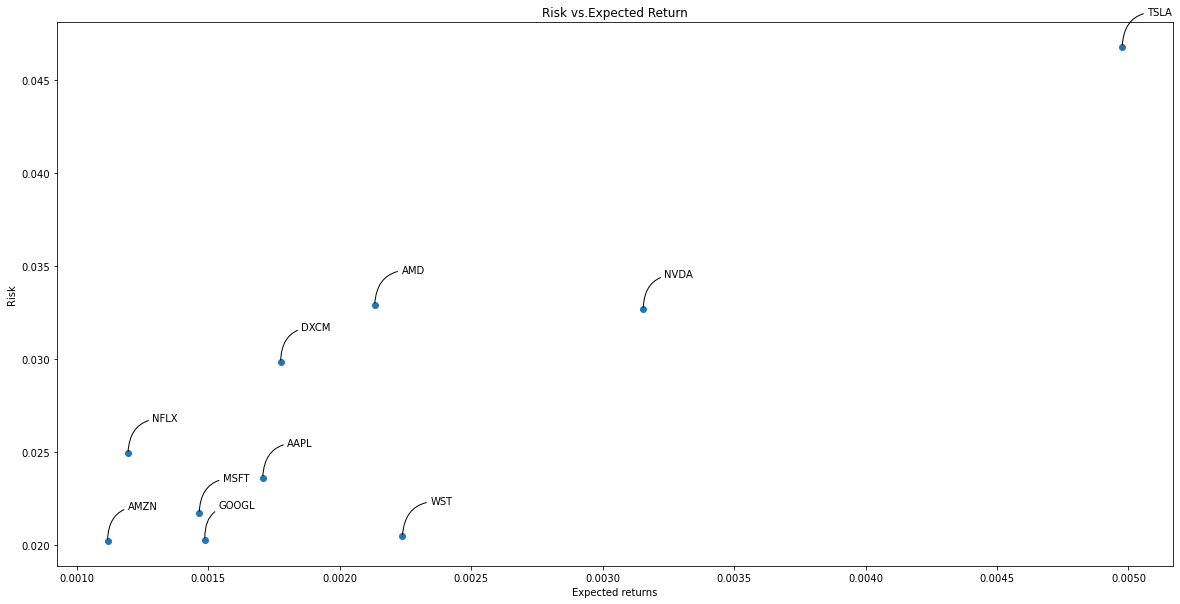

In [23]:
#I found very interesting to compare expected return vs risk
#https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787123137/15/ch15lvl1sec134/determining-risk-relative-to-expected-returns
returns = log_returns #using log_return 
plt.figure(figsize=(20,10)) 
plt.scatter(returns.mean(), returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title('Risk vs.Expected Return')
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))

### based on diagram above we can conclude that TSLA has highest expected return and highest risk ,AMZN on other hand has low risk but low return while AMD has moderate return and risk.